Debanhy Alvarado Rivera 1914796

Edith Estefanía Gonzalez Vallejo 1900388

Annya Michelle Treviño Mendiola 1899837

Valeria Olvera Casillas 1896082

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debanhyrivera","key":"784b3a41d22621a2d98956c6e2be65e1"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                       Diabetes Dataset                                      9KB  2022-10-06 08:55:25          18024        512  1.0              
akshaydattatraykhare/data-for-admission-in-the-university   Data for Admission in the University                  4KB  2022-10-27 11:05:45           5083        118  1.0              
thedevastator/jobs-dataset-from-glassdoor                   Salary Prediction                                     3MB  2022-11-16 13:52:31           1444         43  1.0              
meirnizri/covid19-dataset                                   COVID-19 Dataset    

In [ ]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!mkdir '/content/drive/My Drive/Colab Notebooks/db/'
!unzip brain-mri-images-for-brain-tumor-detection.zip -d '/content/drive/My Drive/Colab Notebooks/db/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/db/’: File exists
Archive:  brain-mri-images-for-brain-tumor-detection.zip
replace /content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/drive/My Drive/Colab Notebook

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2
import glob
import os
import numpy as np
import pandas as pd

In [ ]:
Dataset = '/content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/yes'
Brain_Tumor = []
img_size = 28
for img in os.listdir(Dataset) :
  img = cv2.imread(os.path.join(Dataset,img))
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize= cv2.resize(img,(img_size,img_size))
  img_resize = cv2.bitwise_not(img_resize)
  Brain_Tumor.append(img_resize)

In [ ]:
Brain_Tumor = np.array(Brain_Tumor)
print(Brain_Tumor.shape)

(155, 28, 28, 3)


In [ ]:
Dataset = '/content/drive/My Drive/Colab Notebooks/db/brain_tumor_dataset/no'
No_Brain_Tumor = []
img_size = 28
for img in os.listdir(Dataset) :
  img = cv2.imread(os.path.join(Dataset,img))
  #img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize= cv2.resize(img,(img_size,img_size))
  img_resize = cv2.bitwise_not(img_resize)
  No_Brain_Tumor.append(img_resize)

In [ ]:
No_Brain_Tumor = np.array(No_Brain_Tumor)
print(No_Brain_Tumor.shape)

(98, 28, 28, 3)


In [ ]:
images = np.concatenate([Brain_Tumor, No_Brain_Tumor])
print(len(images))
Images = np.array(images)
#Images = Images.reshape(list(Images.shape) + [1])
print(Images.shape)

253
(253, 28, 28, 3)


In [ ]:
labels_Brain_Tumor = np.repeat(0,155)
print(len(labels_Brain_Tumor))
print(labels_Brain_Tumor)

155
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [ ]:
labels_No_Brain_Tumor = np.repeat(1,98)
print(len(labels_No_Brain_Tumor))
print(labels_No_Brain_Tumor)

98
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
class_names = ['Brain_Tumor', 'No_Brain_Tumor']
labels = np.concatenate([labels_Brain_Tumor, labels_No_Brain_Tumor])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)

253
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(253,)


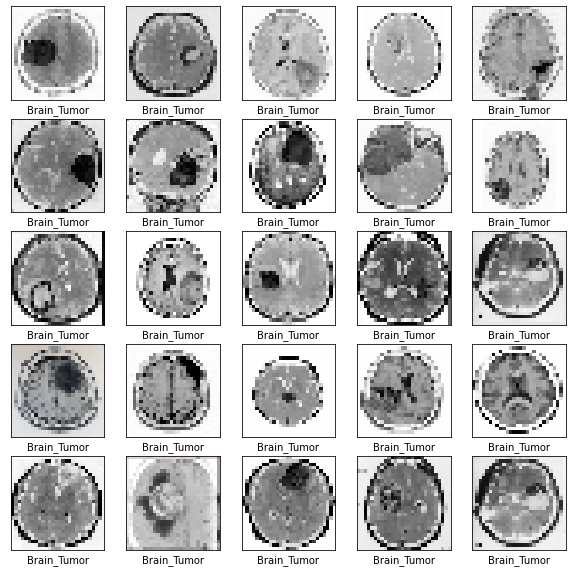

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Images[i])
  cmap= plt.cm.binary
  plt.xlabel(class_names[Labels[i]])
plt.show()

In [ ]:
train_Images, test_Images, train_Labels, test_Labels = train_test_split(Images, Labels, test_size = 0.2)
print(train_Images.shape, train_Labels.shape)
print(test_Images.shape, test_Labels.shape)

train_Images = train_Images.astype('float32')
test_Images = test_Images.astype('float32')
train_Images = train_Images / 255.0
test_Images = test_Images / 255.0

#train_Labels_one_hot = to_categorical(train_Labels)
#test_Labels_one_hot = to_categorical(test_Labels)

#print('Original label:', train_Labels[0])
#print('After conversion to one-hot:', train_Labels_one_hot[0])

(202, 28, 28, 3) (202,)
(51, 28, 28, 3) (51,)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_Images, train_Labels, epochs=50, 
                    validation_data=(test_Images, test_Labels))

Epoch 1/50
7/7 [==============================] - 1s 76ms/step - loss: 1.8948 - accuracy: 0.5198 - val_loss: 1.0339 - val_accuracy: 0.6078
Epoch 2/50
7/7 [==============================] - 0s 46ms/step - loss: 0.7724 - accuracy: 0.6040 - val_loss: 0.7102 - val_accuracy: 0.3922
Epoch 3/50
7/7 [==============================] - 0s 49ms/step - loss: 0.6911 - accuracy: 0.6040 - val_loss: 1.0397 - val_accuracy: 0.3922
Epoch 4/50
7/7 [==============================] - 0s 43ms/step - loss: 0.8142 - accuracy: 0.5198 - val_loss: 0.6120 - val_accuracy: 0.8235
Epoch 5/50
7/7 [==============================] - 0s 44ms/step - loss: 0.6088 - accuracy: 0.6535 - val_loss: 0.5808 - val_accuracy: 0.7059
Epoch 6/50
7/7 [==============================] - 0s 46ms/step - loss: 0.5802 - accuracy: 0.6881 - val_loss: 0.5498 - val_accuracy: 0.7843
Epoch 7/50
7/7 [==============================] - 0s 47ms/step - loss: 0.5731 - accuracy: 0.7327 - val_loss: 0.5621 - val_accuracy: 0.6471
Epoch 8/50
7/7 [===========

2/2 - 0s - loss: 0.8280 - accuracy: 0.8235 - 55ms/epoch - 28ms/step


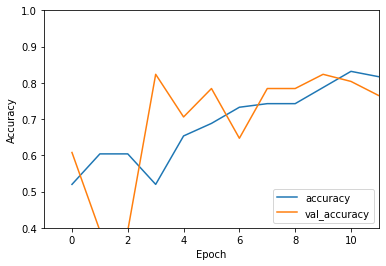

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_Images,  test_Labels, verbose=2)

In [ ]:
predictions = model.predict(Images)
print(predictions.shape)
predictions = (np.expand_dims(img, 0))
print(predictions.shape)

8/8 [==============================] - 0s 23ms/step
(253, 10)
(1, 512, 512, 3)


**First classification**

In [ ]:
img = Images[167]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


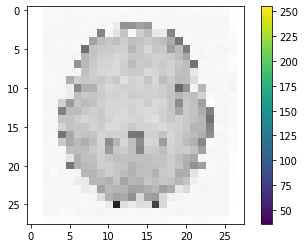

In [ ]:
plt.figure()
plt.imshow(Images[167])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[167]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
1
The predicted class is:  No_Brain_Tumor
The real class is:  No_Brain_Tumor


**Second classification**

In [ ]:
img = Images[29]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


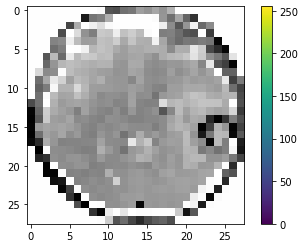

In [ ]:
plt.figure()
plt.imshow(Images[29])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[29]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 19ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
0
The predicted class is:  Brain_Tumor
The real class is:  Brain_Tumor


***Third classification***

In [ ]:
img = Images[175]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


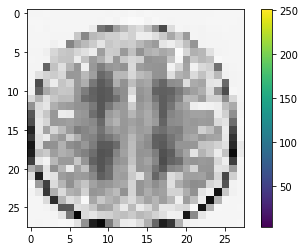

In [ ]:
plt.figure()
plt.imshow(Images[175])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[175]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
1
The predicted class is:  No_Brain_Tumor
The real class is:  No_Brain_Tumor


**Fourth classification**

In [ ]:
img = Images[169]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


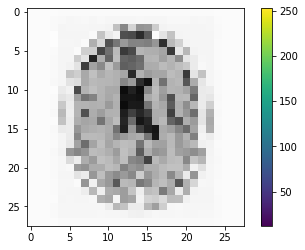

In [ ]:
plt.figure()
plt.imshow(Images[169])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[169]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
1
The predicted class is:  No_Brain_Tumor
The real class is:  No_Brain_Tumor


**Fifth classification**

In [ ]:
img = Images[126]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


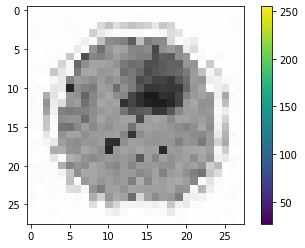

In [ ]:
plt.figure()
plt.imshow(Images[126])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[126]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
0
The predicted class is:  Brain_Tumor
The real class is:  Brain_Tumor


**sixth classification**

In [ ]:
img = Images[16]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


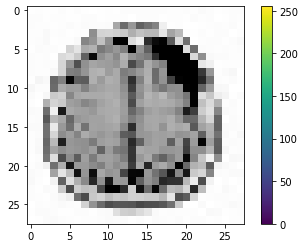

In [ ]:
plt.figure()
plt.imshow(Images[16])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[16]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 20ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
0
The predicted class is:  Brain_Tumor
The real class is:  Brain_Tumor


**seventh classification**

In [ ]:
img = Images[23]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


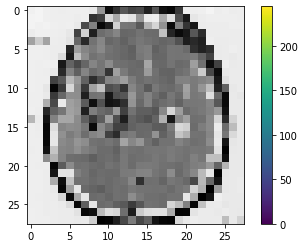

In [ ]:
plt.figure()
plt.imshow(Images[23])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[23]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
0
The predicted class is:  Brain_Tumor
The real class is:  Brain_Tumor


**eighth classification**

In [ ]:
img = Images[199]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


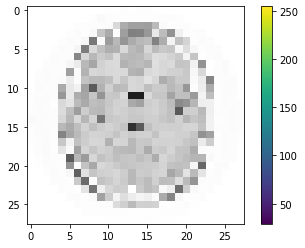

In [ ]:
plt.figure()
plt.imshow(Images[199])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[199]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 22ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
1
The predicted class is:  No_Brain_Tumor
The real class is:  No_Brain_Tumor


**ninth classification**

In [ ]:
img = Images[7]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


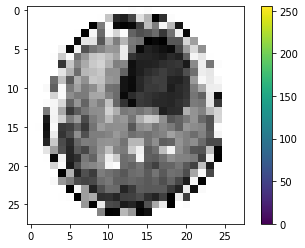

In [ ]:
plt.figure()
plt.imshow(Images[7])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[7]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
0
The predicted class is:  Brain_Tumor
The real class is:  Brain_Tumor


**tenth classification**

In [ ]:
img = Images[250]
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28, 3)
(1, 28, 28, 3)


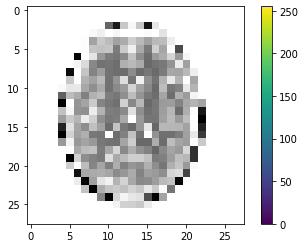

In [ ]:
plt.figure()
plt.imshow(Images[250])
plt.colorbar()
plt.grid(False)
plt.show()
y = Labels[250]

In [ ]:
predictions= model.predict(img)
print(predictions)
print(np.sum(predictions))
print(np.argmax(predictions))
print("The predicted class is: ", class_names[np.argmax(predictions)])
print("The real class is: ", class_names[y])

1/1 [==============================] - 0s 19ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
1
The predicted class is:  No_Brain_Tumor
The real class is:  No_Brain_Tumor
